In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from fbprophet import Prophet
from bokeh.plotting import figure, output_notebook, show, output_file
from bokeh.models import ColumnarDataSource
from bokeh.models.tools import HoverTool

In [2]:
data = pd.read_csv('btc.csv')

In [3]:
data['date '] = pd.to_datetime(data['date '])

In [4]:
data_new = data[data['date '] > '2021-1-23'].reset_index(drop=True)

In [5]:
# Creat Model:
p = Prophet()
## Prophet Libarary Must Need These Columns  ds: datetime & target : y 
## Reanem These Columns Into ds & y 
n = data_new.rename(columns={'date ': 'ds', 'close': 'y'})

In [6]:
p.fit(n)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [7]:
future = p.make_future_dataframe(periods=384, freq='15min')
future.tail()

,ds
6032,2021-03-26 23:00:00
6033,2021-03-26 23:15:00
6034,2021-03-26 23:30:00
6035,2021-03-26 23:45:00
6036,2021-03-27 00:00:00


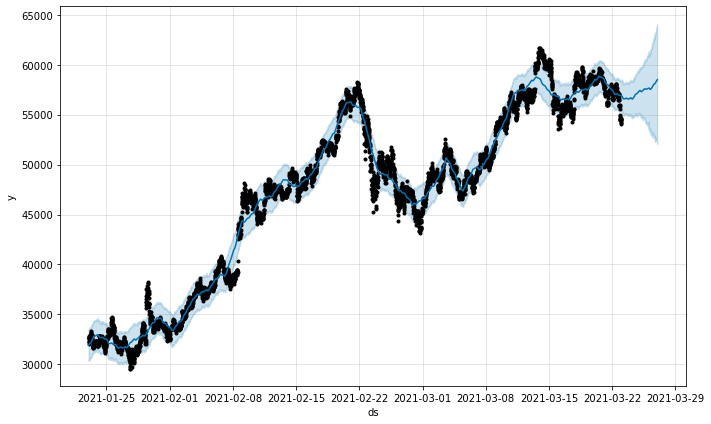

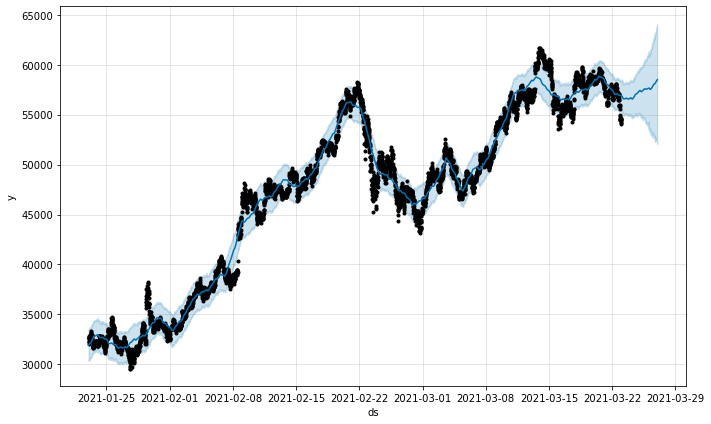

In [8]:
forecast = p.predict(future)
p.plot(forecast, uncertainty=True)

In [9]:
output_file('2mah_etc_4.html')
fig = figure(x_axis_type="datetime")
fig.scatter(source=forecast, x = 'ds', y = 'yhat')
h = HoverTool(formatters= {'@ds': 'datetime'})
h.tooltips = [
    ('yhat', '@yhat'),
    ('date','@ds{%D %H:%M:%S}')

]
fig.add_tools(h)
show(fig)